In [68]:
import re
import csv
import json
from collections import defaultdict
from collections import OrderedDict
from collections import Counter
import numpy as np
import random
import pandas as pd
from pandas import Series
from matplotlib import pyplot as plt

In [69]:
csvfile =  pd.read_csv(open('GermanCredit.csv'))

Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [70]:
csvfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [71]:
noneDict = {col: None for col in csvfile.columns}
noneDict

{'checking_status': None,
 'duration': None,
 'credit_history': None,
 'purpose': None,
 'credit_amount': None,
 'savings_status': None,
 'employment': None,
 'installment_commitment': None,
 'personal_status': None,
 'other_parties': None,
 'residence_since': None,
 'property_magnitude': None,
 'age': None,
 'other_payment_plans': None,
 'housing': None,
 'existing_credits': None,
 'job': None,
 'num_dependents': None,
 'own_telephone': None,
 'foreign_worker': None,
 'class': None}

In [72]:
noneLst = []
for key in noneDict:
    noneCount = csvfile[key].value_counts().get('none', 0)
    noneDict[key] = noneCount
    noneLst.append(noneCount)
noneDict
noneLst.sort(reverse=True)
noneDict

{'checking_status': 0,
 'duration': 0,
 'credit_history': 0,
 'purpose': 0,
 'credit_amount': 0,
 'savings_status': 0,
 'employment': 0,
 'installment_commitment': 0,
 'personal_status': 0,
 'other_parties': 907,
 'residence_since': 0,
 'property_magnitude': 0,
 'age': 0,
 'other_payment_plans': 814,
 'housing': 0,
 'existing_credits': 0,
 'job': 0,
 'num_dependents': 0,
 'own_telephone': 596,
 'foreign_worker': 0,
 'class': 0}

In [73]:
def dropCol(noneDict, noneLst, n=3):
    for i in range(n):
        val = noneLst[i]
        print(val)
        for key in noneDict:
            if noneDict[key] == val:
                col = key
                noneDict[key] = 0
                break
        del csvfile[key]
        print(key)
    return csvfile

dropCol(noneDict, noneLst)
    

907
other_parties
814
other_payment_plans
596
own_telephone


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [74]:
csvfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   residence_since         1000 non-null   int64 
 10  property_magnitude      1000 non-null   object
 11  age                     1000 non-null   int64 
 12  housing                 1000 non-null   object
 13  existing_credits        1000 non-null   int64 
 14  job                     1000 non-null   object
 15  num_d

Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [75]:
csvfile

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [76]:
csvfile.select_dtypes(include=['object'])

,checking_status,credit_history,purpose,savings_status,employment,personal_status,property_magnitude,housing,job,foreign_worker,class
0,'<0','critical/other existing credit',radio/tv,'no known savings','>=7','male single','real estate',own,skilled,yes,good
1,'0<=X<200','existing paid',radio/tv,'<100','1<=X<4','female div/dep/mar','real estate',own,skilled,yes,bad
2,'no checking','critical/other existing credit',education,'<100','4<=X<7','male single','real estate',own,'unskilled resident',yes,good
3,'<0','existing paid',furniture/equipment,'<100','4<=X<7','male single','life insurance','for free',skilled,yes,good
4,'<0','delayed previously','new car','<100','1<=X<4','male single','no known property','for free',skilled,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking','existing paid',furniture/equipment,'<100','4<=X<7','female div/dep/mar','real estate',own,'unskilled resident',yes,good
996,'<0','existing paid','used car','<100','1<=X<4','male div/sep','life insurance',own,'high qualif/self emp/mgmt',yes,good
997,'no checking','existing paid',radio/tv,'<100','>=7','male single',car,own,skilled,yes,good
998,'<0','existing paid',radio/tv,'<100','1<=X<4','male single','no known property','for free',skilled,yes,bad


In [77]:
for columns in csvfile.select_dtypes(include=['object']):
    csvfile[columns] = csvfile[columns].str.replace('\'','')

In [78]:
csvfile

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [79]:
csvfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   residence_since         1000 non-null   int64 
 10  property_magnitude      1000 non-null   object
 11  age                     1000 non-null   int64 
 12  housing                 1000 non-null   object
 13  existing_credits        1000 non-null   int64 
 14  job                     1000 non-null   object
 15  num_d

The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [80]:
csvfile['checking_status'] = csvfile['checking_status'].str.replace('<0', 'Low')
csvfile['checking_status'] = csvfile['checking_status'].str.replace('no checking', 'No Checking')
csvfile['checking_status'] = csvfile['checking_status'].str.replace('0<=X<200', 'Medium')
csvfile['checking_status'] = csvfile['checking_status'].str.replace('>=200', 'High')

The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').


In [81]:
csvfile['savings_status'] = csvfile['savings_status'].str.replace('no known savings', 'No Savings')
csvfile['savings_status'] = csvfile['savings_status'].str.replace('<100', 'Low')
csvfile['savings_status'] = csvfile['savings_status'].str.replace('100<=X<500', 'Medium')
# csvfile['savings_status'] = csvfile['savings_status'].str.replace('500<=X<1000', 'High')
# csvfile['savings_status'] = csvfile['savings_status'].str.replace('>=1000', 'High')
csvfile['savings_status'] = csvfile['savings_status'].replace({'500<=X<1000': 'High', '>=1000': 'High'})

In [82]:
csvfile

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


Change class column values from 'good' to '1' and 'bad' to '0'.

In [83]:
csvfile['class'] = csvfile['class'].str.replace('good','1')

In [84]:
csvfile['class'] = csvfile['class'].str.replace('bad','0')

In [85]:
csvfile

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [86]:
csvfile['employment'] = csvfile['employment'].str.replace('unemployed','Unemployed')

In [87]:
csvfile['employment'] = csvfile['employment'].str.replace('<1','Amateur')

In [88]:
csvfile['employment'] = csvfile['employment'].str.replace('1<=X<4','Professional')

In [89]:
csvfile['employment'] = csvfile['employment'].str.replace('4<=X<7','Experienced')

In [90]:
csvfile['employment'] = csvfile['employment'].str.replace('>=7','Expert')

In [91]:
csvfile

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [92]:
data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
        'Category': ['A', 'B', 'A', 'A', 'B']}

# Creating DataFrame
df = pd.DataFrame(data)

# Crosstab calculation
cross_tab = pd.crosstab(df['Gender'], df['Category'])

print(cross_tab)
df

Category  A  B
Gender        
Female    1  2
Male      2  0


,Gender,Category
0,Male,A
1,Female,B
2,Female,A
3,Male,A
4,Female,B


Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [93]:
pd.crosstab(csvfile['foreign_worker'],csvfile['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


Similarly, get the count of each category of employment for each category of saving_status.

In [94]:
pd.crosstab(csvfile['savings_status'],csvfile['employment'])

employment,Amateur,Experienced,Expert,Professional,Unemployed
savings_status,,,,,
500<=XLow0,5,9,20,26,3
High,7,9,14,18,0
Low,120,100,133,210,40
Medium,17,24,22,33,7
No Savings,23,32,64,52,12


Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding

In [95]:
avgCred = csvfile.loc[(csvfile['employment'] == 'Experienced') & (csvfile['personal_status'] == 'male single')]['credit_amount'].mean()
avgCred

4142.592592592592

Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [96]:
jobToCredit = {}
for index, row in csvfile.iterrows():
    job = row['job']
    credit = row['credit_amount']
    jobToCredit[job] = jobToCredit.get(job, []) + [credit]
for job, credits in jobToCredit.items():
    jobToCredit[job] = sum(credits) / len(credits)
jobToCredit

{'skilled': 3070.9650793650794,
 'unskilled resident': 2358.52,
 'high qualif/self emp/mgmt': 5435.493243243243,
 'unemp/unskilled non res': 2745.1363636363635}

For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:
    Most common checking status: ...
    Most common savings status: ...


In [97]:
educated = csvfile.loc[csvfile['purpose'] == 'education']
# check = educated['checking_status'].value_counts()
# print(check)

# check = educated['savings_status'].value_counts()
# print(check)
checkStatus = educated['checking_status'].value_counts().idxmax()
savingStatus = educated['savings_status'].value_counts().idxmax()
print(f'Most common checking status: {checkStatus}')
print(f'Most common savings status: {savingStatus}')

Most common checking status: No Checking
Most common savings status: Low


Plot subplots of two bar charts: one for savings_status (x-axis) and the other for checking_status (x-axis). In each chart, the y-axis represents number of people. Moreover, for each category of saving_status (checking_status), we need you to display four bars, each corresponding to one of the "personal_status" categories. Each personal status category bar should be of a different color.

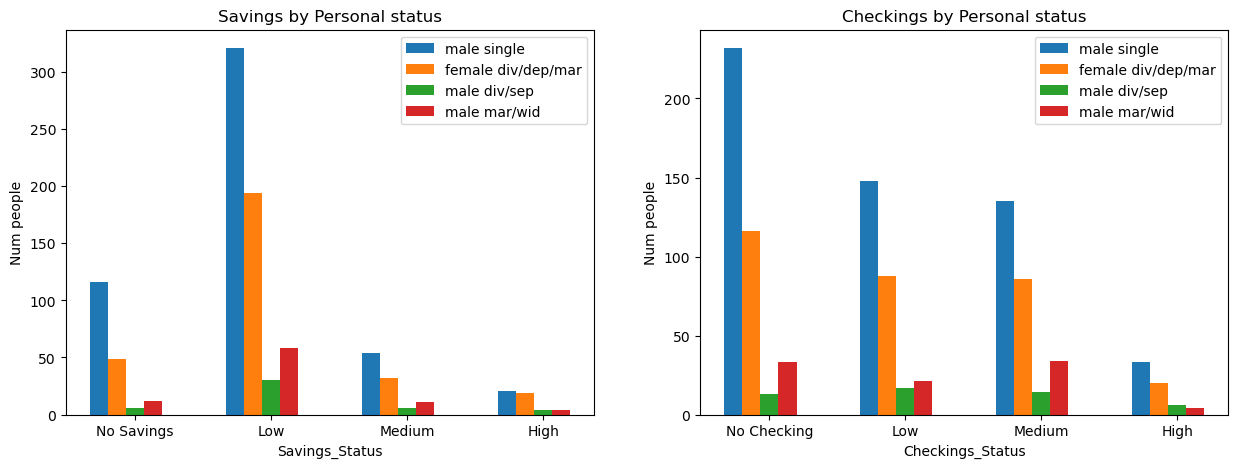

In [105]:
fig, axes  = plt.subplots(1,2,figsize=(15,5))
# count_both_conditions = ((csvfile['column_name_1'] == 'male singles') & (csvfile['column_name_2'] == '<=100')).sum()
pstatus = ['male single', 'female div/dep/mar', 'male div/sep', 'male mar/wid']
savings = ['No Savings', 'Low', 'Medium', 'High']
checkings = ['No Checking', 'Low','Medium', 'High']
combo_savings = [(an1,an2) for an1 in savings for an2 in pstatus]
combo_checkings = [(an1,an2) for an1 in checkings for an2 in pstatus]
num = 0
saveDict = defaultdict(list)
checkDict = defaultdict(list)
for saving, status in combo_savings:
    count = len(csvfile[(csvfile['savings_status'] == saving) & (csvfile['personal_status'] == status)])
    
    saveDict[status].append(count)
xs = [5,35,65,95]
for idx,item in enumerate(saveDict.items()):
    key = item[0]
    value = item[1]
    newxs = [x + (idx*4) for x in xs]
    axes[0].bar(newxs,value, 4, label=key)
axes[0].set_xticks([13,43,73,103],savings)
axes[0].set_xlabel('Savings_Status')
axes[0].set_ylabel('Num people')
axes[0].set_title('Savings by Personal status')
axes[0].legend()


for checking, status in combo_checkings:
    count = len(csvfile[(csvfile['checking_status'] == checking) & (csvfile['personal_status'] == status)])
    
    checkDict[status].append(count)
xs = [5,35,65,95]
for idx,item in enumerate(checkDict.items()):
    key = item[0]
    value = item[1]
    newxs = [x + (idx*4) for x in xs]
    axes[1].bar(newxs,value, 4, label=key)
axes[1].set_xticks([13,43,73,103],checkings)
axes[1].set_xlabel('Checkings_Status')
axes[1].set_ylabel('Num people')
axes[1].set_title('Checkings by Personal status')
axes[1].legend()
# csvfile[csvfile['checking_status'] == 'No Checking']

For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).


In [108]:
subdf = csvfile[csvfile['credit_amount'] > 4000]
subdf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
5,No Checking,36,existing paid,education,9055,No Savings,Professional,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,1
7,Medium,36,existing paid,used car,6948,Low,Professional,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,No Checking,48,existing paid,business,4844,Low,Unemployed,3,male single,2,car,33,rent,1,high qualif/self emp/mgmt,1,yes,0
983,Low,36,existing paid,used car,8229,Low,Professional,2,male single,2,life insurance,26,own,1,skilled,2,yes,0
986,High,42,no credits/all paid,business,6289,Low,Amateur,2,male div/sep,1,life insurance,33,own,2,skilled,1,yes,1
988,Low,24,existing paid,used car,6579,Low,Unemployed,4,male single,2,no known property,29,for free,1,high qualif/self emp/mgmt,1,yes,1


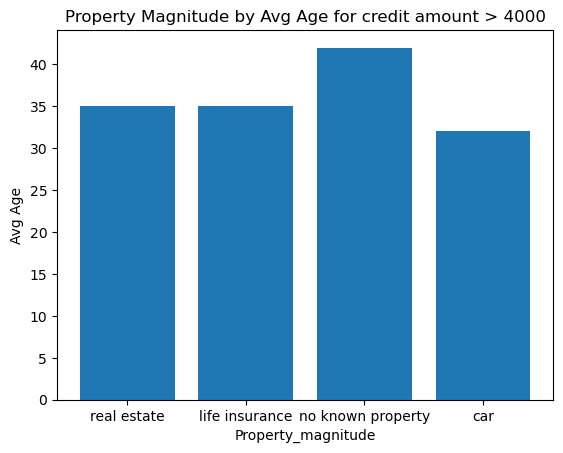

In [114]:
creditDict = defaultdict(list)
for row in subdf.iterrows():
    ser  = row[1]
    prop = ser['property_magnitude']
    age = ser['age']
    creditDict[prop].append(age)

creditDict = dict(creditDict)
for key in creditDict.keys():
    creditDict[key] = sum(creditDict[key]) // len(creditDict[key])

plt.bar(creditDict.keys(),creditDict.values())
plt.xlabel('Property_magnitude')
plt.ylabel('Avg Age')
plt.title('Property Magnitude by Avg Age for credit amount > 4000')
plt.show()

For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
Personal status
Credit history
Job

In [115]:
subdf = csvfile[(csvfile['savings_status'] == 'High') & (csvfile['age'] > 40)]
subdf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
8,No Checking,12,existing paid,radio/tv,3059,High,Experienced,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,1
27,High,12,all paid,radio/tv,409,High,Professional,3,female div/dep/mar,3,real estate,42,rent,2,skilled,1,yes,1
94,Medium,12,existing paid,new car,1318,High,Expert,4,male single,4,real estate,54,own,1,skilled,1,yes,1
149,No Checking,18,critical/other existing credit,radio/tv,1582,High,Expert,4,male single,4,car,46,own,2,skilled,1,yes,1
183,No Checking,24,critical/other existing credit,furniture/equipment,3777,High,Professional,4,male single,4,real estate,50,own,1,skilled,1,yes,1
190,No Checking,24,existing paid,business,4591,High,Professional,2,male single,3,life insurance,54,own,3,high qualif/self emp/mgmt,1,yes,0
209,No Checking,12,existing paid,used car,1413,High,Experienced,3,male single,2,life insurance,55,own,1,skilled,1,no,1
399,No Checking,24,critical/other existing credit,radio/tv,1516,High,Professional,4,female div/dep/mar,1,real estate,43,own,2,unskilled resident,1,yes,1
427,No Checking,18,critical/other existing credit,radio/tv,1149,High,Professional,4,male single,3,real estate,46,own,2,skilled,1,yes,1
449,Medium,15,delayed previously,repairs,1512,High,Professional,3,male mar/wid,3,life insurance,61,own,2,skilled,1,yes,0


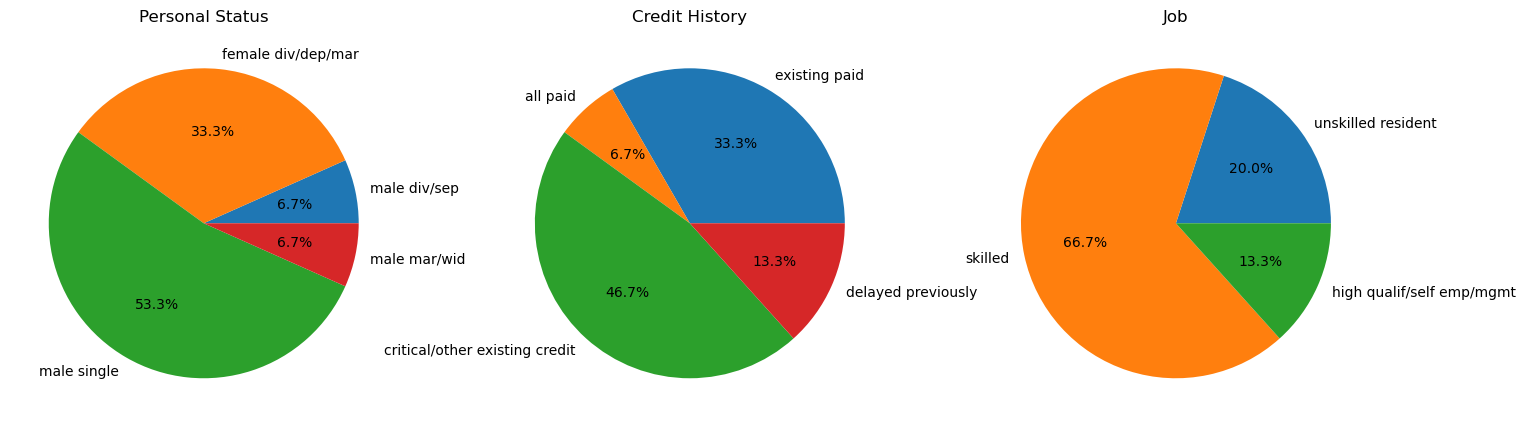

In [125]:
fig, axes = plt.subplots(1,3,figsize = (15,5))
fig.tight_layout(pad=3.0)
pDict = defaultdict(list)
cDict = defaultdict(list)
jDict = defaultdict(list)
for row in subdf.iterrows():
    ser  = row[1]
    pstatus = ser['personal_status']
    credit = ser['credit_history']
    job = ser['job']
    pDict[pstatus].append(1)
    cDict[credit].append(1)
    jDict[job].append(1)

pDict = dict(pDict)
for key in pDict.keys():
    pDict[key] = len(pDict[key])
cDict = dict(cDict)
for key in cDict.keys():
    cDict[key] = len(cDict[key])
jDict = dict(jDict)
for key in jDict.keys():
    jDict[key] = len(jDict[key])
    
axes[0].pie(pDict.values(),labels=pDict.keys(),autopct='%1.1f%%')
axes[0].set_title('Personal Status')
axes[1].pie(cDict.values(),labels=cDict.keys(),autopct='%1.1f%%')
axes[1].set_title('Credit History')
axes[2].pie(jDict.values(),labels=jDict.keys(),autopct='%1.1f%%')
axes[2].set_title('Job')
plt.show()